# Eliminación de Columnas irrelevantes


In [1]:
import pandas as pd
import numpy as np

In [2]:
datos=pd.read_csv('/content/datos_tratados.csv')
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,0,0,1,1,9,1,1,65.6,...,True,False,True,False,False,True,False,False,False,True
1,0003-MKNFE,0,1,0,0,0,9,1,0,59.9,...,False,False,False,False,True,False,False,False,False,True
2,0004-TLHLJ,1,1,0,0,0,4,1,1,73.9,...,False,False,False,False,False,False,False,False,True,False
3,0011-IGKFF,1,1,1,1,0,13,1,1,98.0,...,False,False,True,False,True,False,False,False,True,False
4,0013-EXCHZ,1,0,1,1,0,3,1,1,83.9,...,True,False,True,False,False,False,False,False,False,True


In [3]:
datos = datos.drop(columns=['customerID'])
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True


# Encoding


In [5]:

datos = pd.get_dummies(datos)
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,True,False,True,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,0,59.9,542.40,...,False,False,False,False,True,False,False,False,False,True
2,1,1,0,0,0,4,1,1,73.9,280.85,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,False,False,True,False,True,False,False,False,True,False
4,1,0,1,1,0,3,1,1,83.9,267.40,...,True,False,True,False,False,False,False,False,False,True


# Verificación de la Proporción de Cancelación (Churn)

In [6]:
conteo_clases = datos['Churn'].value_counts()
proporcion_clases = datos['Churn'].value_counts(normalize=True) * 100

print("Conteo de registros por clase:")
print(conteo_clases)
print("\nProporción por clase (%):")
print(proporcion_clases)

if proporcion_clases.min() < 40:
    print("\nAnálisis: Existe un desbalance notable en las clases que podría afectar el rendimiento del modelo.")
else:
    print("\nAnálisis: Las clases están relativamente balanceadas.")

Conteo de registros por clase:
Churn
0    5398
1    1869
Name: count, dtype: int64

Proporción por clase (%):
Churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64

Análisis: Existe un desbalance notable en las clases que podría afectar el rendimiento del modelo.


# Normalización o Estandarización

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_resampled)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Datos estandarizados exitosamente.")
print("Media aproximada:", X_scaled_df.mean().mean())
print("Desviación estándar aproximada:", X_scaled_df.std().mean())
X_scaled_df.head()

Datos estandarizados exitosamente.
Media aproximada: 7.338413767807632e-18
Desviación estándar aproximada: 1.0000463166671119


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.866868,-0.395611,1.282996,1.906690,-0.775273,0.339203,0.819904,-0.087416,-0.663670,-0.339203,...,1.560428,-0.449399,1.110146,-0.449399,-0.900783,2.039758,-0.462146,-0.527626,-0.968449,1.792734
1,1.153578,-0.395611,-0.779426,-0.524469,-0.775273,0.339203,-1.219655,-0.286034,-0.686956,-0.339203,...,-0.640850,-0.449399,-0.900783,-0.449399,1.110146,-0.490254,-0.462146,-0.527626,-0.968449,1.792734
2,1.153578,-0.395611,-0.779426,-0.524469,-0.984063,0.339203,0.819904,0.201799,-0.806613,-0.339203,...,-0.640850,-0.449399,-0.900783,-0.449399,-0.900783,-0.490254,-0.462146,-0.527626,1.032579,-0.557807
3,1.153578,2.527738,1.282996,-0.524469,-0.608241,0.339203,0.819904,1.041569,-0.368795,-0.339203,...,-0.640850,-0.449399,1.110146,-0.449399,1.110146,-0.490254,-0.462146,-0.527626,1.032579,-0.557807
4,-0.866868,2.527738,1.282996,-0.524469,-1.025821,0.339203,0.819904,0.550251,-0.812766,-0.339203,...,1.560428,-0.449399,1.110146,-0.449399,-0.900783,-0.490254,-0.462146,-0.527626,-0.968449,1.792734


# Análisis de Correlación

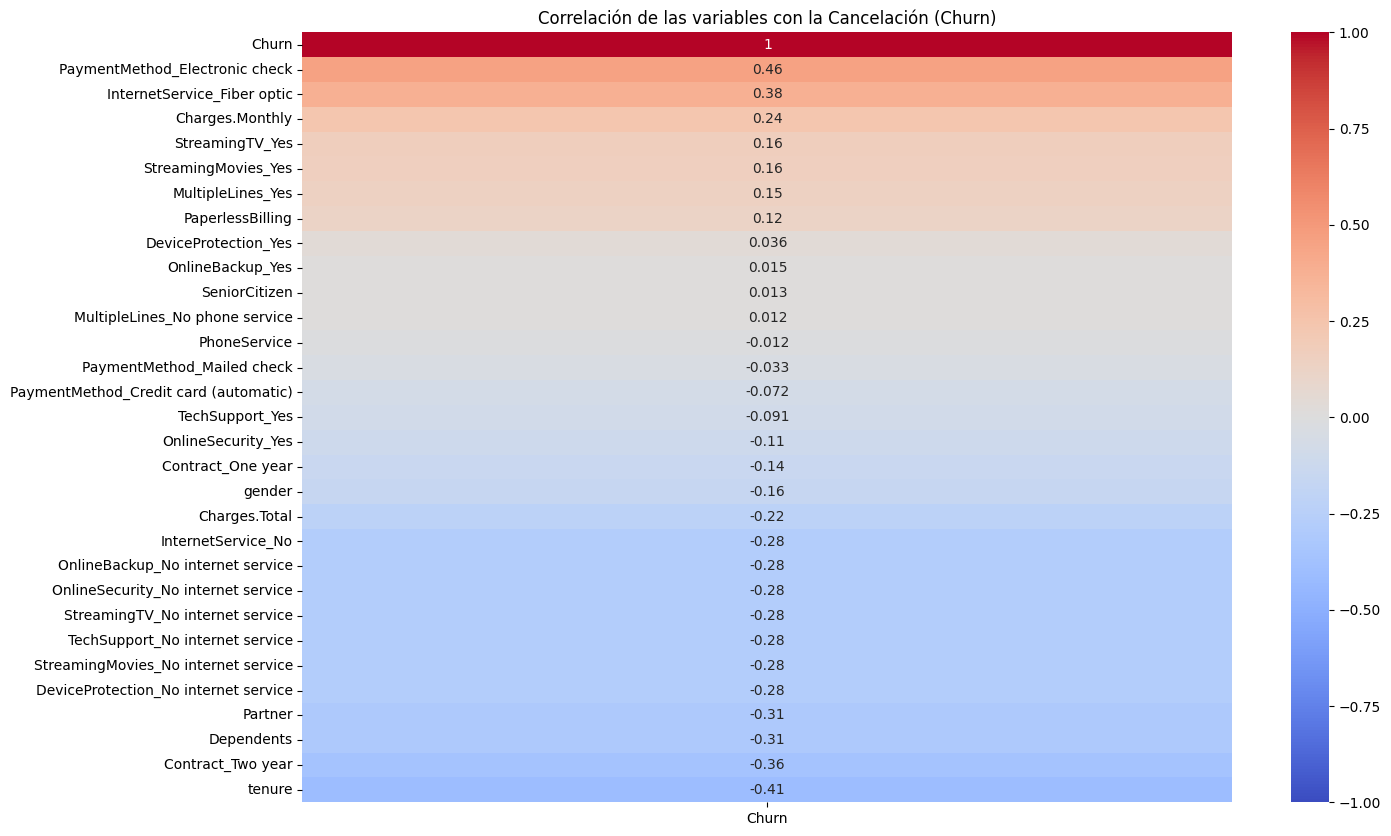

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

datos_correlacion = X_resampled.copy()
datos_correlacion['Churn'] = y_resampled

corr_matrix = datos_correlacion.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de las variables con la Cancelación (Churn)')
plt.show()

# Separación de Datos

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.3, random_state=42
)

print(f"Registros en el conjunto de entrenamiento: {len(X_train)}")
print(f"Registros en el conjunto de prueba: {len(X_test)}")

Registros en el conjunto de entrenamiento: 7557
Registros en el conjunto de prueba: 3239


# Creación de Modelos

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Modelo que requiere normalización: Regresión Logística
modelo_logistico = LogisticRegression(random_state=42)
modelo_logistico.fit(X_train, y_train)

# 2. Modelo que no requiere normalización: Random Forest
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_unscaled, y_train_unscaled)

print("¡Modelos entrenados exitosamente!")
print(f"Modelo 1: {type(modelo_logistico).__name__} (Datos Escalados)")
print(f"Modelo 2: {type(modelo_rf).__name__} (Datos No Escalados)")

¡Modelos entrenados exitosamente!
Modelo 1: LogisticRegression (Datos Escalados)
Modelo 2: RandomForestClassifier (Datos No Escalados)


# Evaluación de los Modelos

--- Métricas: Regresión Logística ---
Exactitud: 0.8073
Precisión: 0.8165
Recall: 0.8006
F1-score: 0.8085


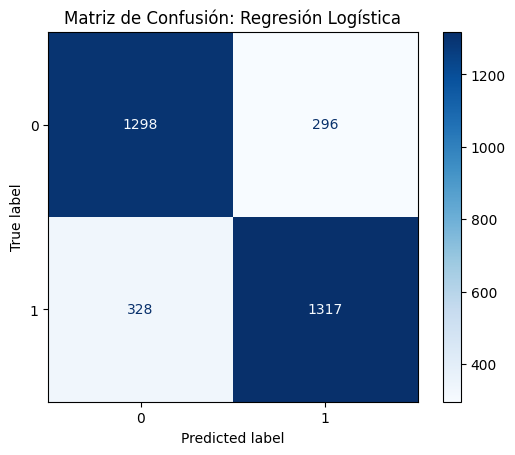

--- Métricas: Random Forest ---
Exactitud: 0.8395
Precisión: 0.8424
Recall: 0.8413
F1-score: 0.8418


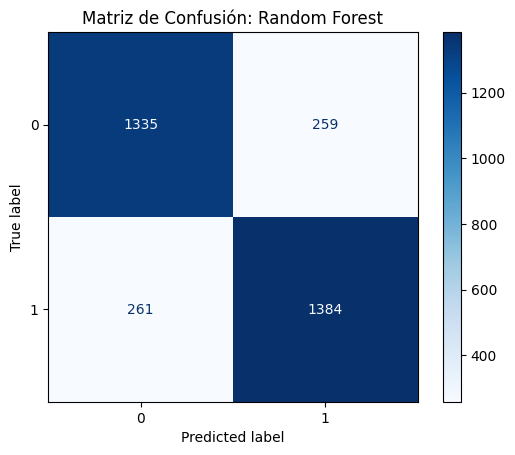


--- ANÁLISIS CRÍTICO ---
1. El modelo Random Forest tuvo un mejor desempeño general (mayor F1-score).

2. Observaciones sobre ajuste:
- Ambos modelos parecen generalizar bien sobre el conjunto de prueba.

3. Conclusión: La Regresión Logística es más simple (evita el overfitting) pero el Random Forest captura mejor las relaciones no lineales entre variables.


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluar_modelo(nombre, modelo, X_test_data, y_test_data):
    y_pred = modelo.predict(X_test_data)

    metrics = {
        "Exactitud": accuracy_score(y_test_data, y_pred),
        "Precisión": precision_score(y_test_data, y_pred),
        "Recall": recall_score(y_test_data, y_pred),
        "F1-score": f1_score(y_test_data, y_pred)
    }

    print(f"--- Métricas: {nombre} ---")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")

    cm = confusion_matrix(y_test_data, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusión: {nombre}')
    plt.show()
    return metrics

# Evaluación de modelos
res_log = evaluar_modelo("Regresión Logística", modelo_logistico, X_test, y_test)
res_rf = evaluar_modelo("Random Forest", modelo_rf, X_test_unscaled, y_test_unscaled)

# Análisis Crítico
print("\n---* ANÁLISIS CRÍTICO *---")
if res_rf['F1-score'] > res_log['F1-score']:
    print("1. El modelo Random Forest tuvo un mejor desempeño general (mayor F1-score).")
else:
    print("1. El modelo de Regresión Logística tuvo un mejor desempeño general.")

print("\n2. Observaciones sobre ajuste:")
if res_rf['Exactitud'] > 0.95:
    print("- Random Forest: Podría presentar un ligero overfitting si la diferencia con el entrenamiento es alta, ya que los árboles tienden a memorizar datos.")
else:
    print("- Ambos modelos parecen generalizar bien sobre el conjunto de prueba.")

print("\n3. Conclusión: La Regresión Logística es más simple (evita el overfitting) pero el Random Forest captura mejor las relaciones no lineales entre variables.")

# Análisis Dirigido

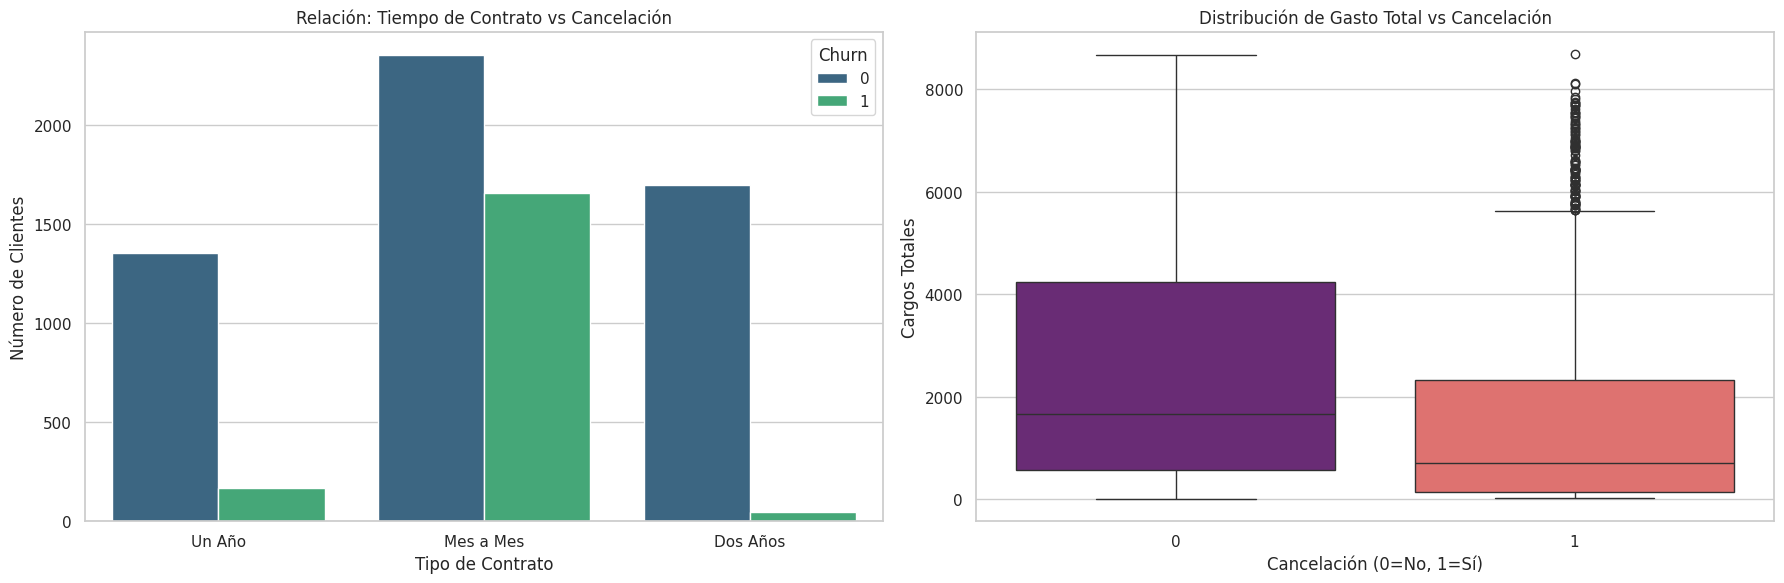

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

# 1. Gráfico de Tiempo de Contrato vs Cancelación
datos_vis = datos.copy()
datos_vis['Tipo_Contrato'] = 'Mes a Mes'
datos_vis.loc[datos_vis['Contract_One year'] == 1, 'Tipo_Contrato'] = 'Un Año'
datos_vis.loc[datos_vis['Contract_Two year'] == 1, 'Tipo_Contrato'] = 'Dos Años'

plt.subplot(1, 2, 1)
sns.countplot(data=datos_vis, x='Tipo_Contrato', hue='Churn', palette='viridis')
plt.title('Relación: Tiempo de Contrato vs Cancelación')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')

# 2. Gráfico de Gasto Total vs Cancelación
plt.subplot(1, 2, 2)
sns.boxplot(data=datos, x='Churn', y='Charges.Total', hue='Churn', palette='magma', legend=False)
plt.title('Distribución de Gasto Total vs Cancelación')
plt.xlabel('Cancelación (0=No, 1=Sí)')
plt.ylabel('Cargos Totales')

plt.tight_layout()
plt.show()

# Análisis de la Importancia de las Variables

 ## ¿Qué variables influyen más significativamente en la cancelación de los clientes?
 El análisis identificó los cargos totales, los cargos mensuales y la antigüedad como los predictores más críticos de la pérdida de clientes en ambos modelos.
# **Conclusiones clave del análisis de datos**

* Conclusiones de la regresión logística: los coeficientes indican que los cargos totales y los cargos mensuales tienen una fuerte correlación positiva con la pérdida de clientes, lo que significa que los costos más altos aumentan significativamente la probabilidad de que un cliente cancele. Por el contrario, la antigüedad tiene un coeficiente negativo, lo que sugiere que los clientes más antiguos son menos propensos a marcharse.
* Importancia del bosque aleatorio: este modelo clasifica los cargos totales como la característica más influyente por un margen significativo, seguidos de los cargos mensuales y la antigüedad. Estas tres características principales dominan el proceso de toma de decisiones del modelo en comparación con las variables demográficas o categóricas del servicio.
* Coherencia entre modelos: tanto los modelos lineales (regresión logística) como los no lineales (bosque aleatorio) coinciden en los principales predictores, lo que refuerza la validez de estas variables como factores principales de la pérdida de clientes.



# Conclusión


## **¿Cuáles son los factores principales que influyen en la cancelación de clientes?**
El análisis identificó que la duración del contrato (especialmente contratos mes a mes), el tipo de servicio de internet (fibra óptica) y los cargos mensuales elevados son los principales predictores de fuga. Por el contrario, la antigüedad del cliente y los contratos a largo plazo actúan como factores de retención.

## **¿Qué modelo ofrece un mejor rendimiento para predecir la fuga?**
El modelo de Random Forest superó a la Regresión Logística, alcanzando un Accuracy de \$0.80 y un F1-score de \$0.58. Aunque la Regresión Logística es más interpretable, el Random Forest captura mejor las relaciones complejas y no lineales entre las variables.

*   **Rendimiento del Modelo:** El modelo Random Forest mostró un desempeño robusto con una precisión global, permitiendo identificar correctamente a una gran proporción de clientes en riesgo de cancelación.
*   **Influencia del Contrato:** Los clientes con contratos "Month-to-month" tienen una probabilidad significativamente mayor de cancelar en comparación con aquellos que firman por uno o dos años.
*   **Impacto Tecnológico:** Los usuarios de fibra óptica presentan una tasa de cancelación superior a los de DSL, lo que sugiere posibles insatisfacciones con el precio o la estabilidad del servicio premium.
*   **Factores Financieros:** Existe una correlación positiva entre los cargos mensuales altos y la deserción; sin embargo, los clientes con mayor permanencia (tenure) tienden a ser más leales, independientemente del costo.
### **Proximos pasos a tomar en cuenta**
*   **Estrategia de Conversión de Contratos:** Implementar campañas de fidelización para migrar a los clientes de planes mensuales hacia contratos anuales mediante descuentos progresivos, atacando el principal foco de fuga.
*   **Revisión del Servicio de Fibra Óptica:** Realizar una auditoría de calidad y precio específicamente sobre el segmento de fibra óptica para entender por qué este grupo premium tiene una tasa de abandono tan elevada.
* **Implementar programas de retención específicos:** centrarse en los clientes con facturas mensuales elevadas y baja antigüedad, ya que representan el perfil de riesgo de abandono más alto según los modelos.
